In [24]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2

Случайный процесс белого шума - это случайный процесс, в котором значения в разные моменты времени независимы друг от друга и имеют по constante вероятности.

In [25]:
# Генерируем белый шум с 1000 точками данных
white_noise = np.random.randn(100)

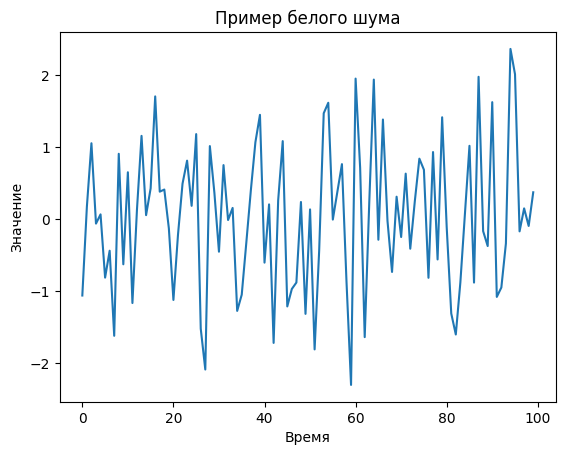

In [26]:
# Визуализируем белый шум
plt.plot(white_noise)
plt.xlabel('Время')
plt.ylabel('Значение')
plt.title('Пример белого шума')
plt.show()


Сделайте оценку среднего значения, среднего квадрата и дисперсии, а также автокорреляционной функции

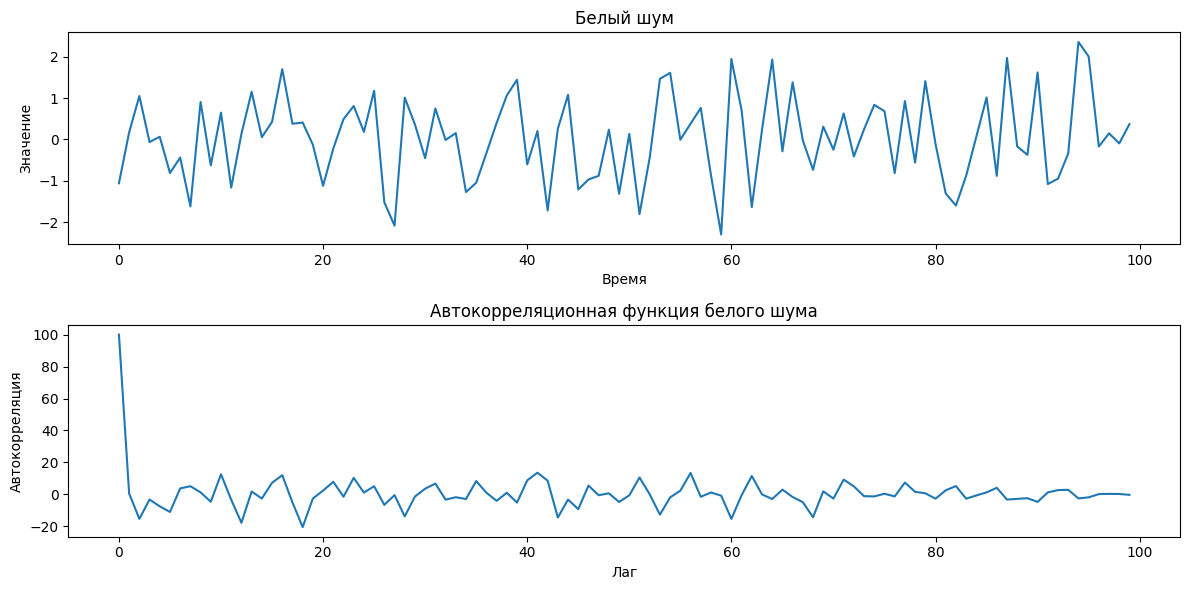

Среднее значение: 0.0325403905750661
Средний квадрат: 1.0099968180866563
Дисперсия: 1.0089379410678785


In [27]:

# Оценка среднего значения
mean_value = np.mean(white_noise)

# Оценка среднего квадрата
mean_square = np.mean(white_noise ** 2)

# Оценка дисперсии
variance = np.var(white_noise)

# Оценка автокорреляционной функции
autocorrelation = np.correlate(white_noise, white_noise, mode='full') / np.var(white_noise)

# Визуализация белого шума и его автокорреляционной функции
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(white_noise)
plt.xlabel('Время')
plt.ylabel('Значение')
plt.title('Белый шум')

plt.subplot(2, 1, 2)
plt.plot(autocorrelation[len(white_noise) - 1:])
plt.xlabel('Лаг')
plt.ylabel('Автокорреляция')
plt.title('Автокорреляционная функция белого шума')

plt.tight_layout()
plt.show()

# Выводим результаты расчетов
print(f"Среднее значение: {mean_value}")
print(f"Средний квадрат: {mean_square}")
print(f"Дисперсия: {variance}")


Оценка ошибок и построение доверительных интервалов

Стандартная ошибка среднего (Standard Error of the Mean, SEM):

In [28]:
sem = np.std(white_noise) / np.sqrt(len(white_noise))
confidence_interval = [mean_value - 1.96 * sem, mean_value + 1.96 * sem]
print("Среднее значение: ", mean_value)
print("Стандартная ошибка среднего: ",sem)
print("Доверительный интервал: ",confidence_interval)

Среднее значение:  0.0325403905750661
Стандартная ошибка среднего:  0.1004459029063843
Доверительный интервал:  [-0.16433357912144714, 0.22941436027157935]


Стандартная ошибка дисперсии:

In [30]:
sem_variance = np.sqrt(2 / (len(white_noise) - 1)) * np.var(white_noise)
dof = len(white_noise) - 1
confidence_interval_variance = [
    (dof * np.var(white_noise)) / chi2.ppf(0.975, dof),
    (dof * np.var(white_noise)) / chi2.ppf(0.025, dof)
]
print("Среднее значение: ", variance)
print("Стандартная ошибка дисперсии: ",sem_variance)
print("Доверительный интервал: ",confidence_interval_variance)


Среднее значение:  1.0089379410678785
Стандартная ошибка дисперсии:  0.1434041945293509
Доверительный интервал:  [0.7777862437774272, 1.3615510554817005]


Оценка АКФ, вычисленине расчетного времени корреляции процесса

In [31]:
# Вычислите АКФ
autocorrelation = np.correlate(white_noise, white_noise, mode='full') / np.var(white_noise)

In [33]:
threshold = 1/np.e  # Порог - 1/e

correlation_time = np.argmax(autocorrelation < threshold)

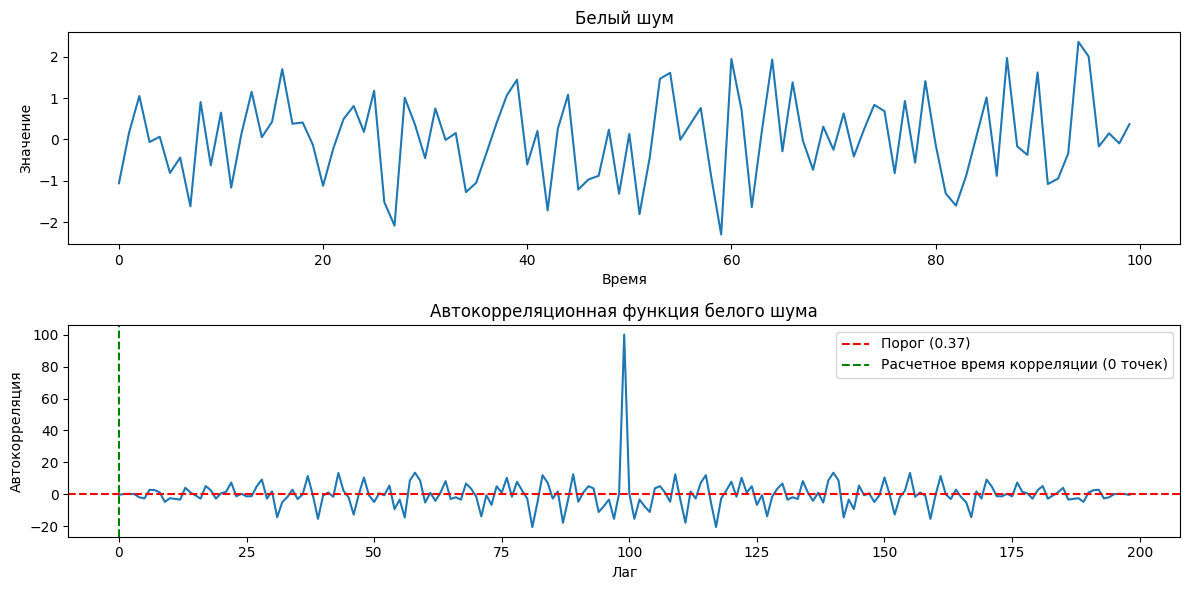

Расчетное время корреляции: 0 точек


In [34]:
# Визуализируем белый шум и его АКФ
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(white_noise)
plt.xlabel('Время')
plt.ylabel('Значение')
plt.title('Белый шум')

plt.subplot(2, 1, 2)
plt.plot(autocorrelation)
plt.axhline(y=threshold, color='r', linestyle='--', label=f'Порог ({threshold:.2f})')
plt.axvline(x=correlation_time, color='g', linestyle='--', label=f'Расчетное время корреляции ({correlation_time} точек)')
plt.xlabel('Лаг')
plt.ylabel('Автокорреляция')
plt.title('Автокорреляционная функция белого шума')
plt.legend()

plt.tight_layout()
plt.show()

# Выводим результат расчета времени корреляции
print(f"Расчетное время корреляции: {correlation_time} точек")

В белом шуме, как случайном процессе, автокорреляционная функция (АКФ) будет близка к нулю для всех лагов, за исключением лага нуль (при лаге нуль АКФ всегда равна 1). Это означает, что в белом шуме нет долгосрочных корреляций, и расчетное время корреляции фактически равно 0.